In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
 pwd

'/content'

Now, importing some few required libraries

In [ ]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

creating a drive variable to access Google Drive

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

i am trying to read sample image and display 

In [ ]:
path = '/content/drive/My Drive/Ineuron project/Emergency_vehicles/images/'
imageName = '1.jpg';
myimage = path+imageName


Display sample image, after that ensures you have done setup google drive to colab

In [ ]:
import matplotlib.pyplot as plt
img = plt.imread(myimage)
img

array([[[30, 29, 24],
        [21, 20, 15],
        [19, 18, 13],
        ...,
        [17, 13, 10],
        [16, 12,  9],
        [15, 11,  8]],

       [[26, 25, 20],
        [19, 18, 13],
        [17, 16, 11],
        ...,
        [16, 12,  9],
        [14, 10,  7],
        [11,  7,  4]],

       [[23, 23, 15],
        [17, 16, 11],
        [16, 15, 10],
        ...,
        [13,  9,  6],
        [13,  9,  6],
        [13,  9,  6]],

       ...,

       [[70, 75, 78],
        [69, 74, 77],
        [70, 75, 78],
        ...,
        [39, 43, 46],
        [37, 41, 44],
        [34, 38, 41]],

       [[68, 73, 76],
        [68, 73, 76],
        [69, 74, 77],
        ...,
        [37, 41, 44],
        [37, 41, 44],
        [37, 41, 44]],

       [[73, 78, 81],
        [73, 78, 81],
        [75, 80, 83],
        ...,
        [30, 34, 37],
        [33, 37, 40],
        [37, 41, 44]]], dtype=uint8)

(224, 224, 3)


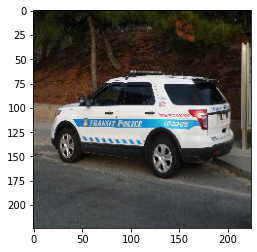

In [ ]:
plt.imshow(img)
print(img.shape)

for multiple image use in google colab then     
  
       from glob import glob
       images = glob(path+"*.jpg")

In [ ]:
from glob import glob
images = glob(path+"*.jpg")

I am taking 10 images

In [ ]:
images[1:10]

['/content/drive/My Drive/Ineuron project/Emergency_vehicles/images/511.jpg',
 '/content/drive/My Drive/Ineuron project/Emergency_vehicles/images/1652.jpg',
 '/content/drive/My Drive/Ineuron project/Emergency_vehicles/images/883.jpg',
 '/content/drive/My Drive/Ineuron project/Emergency_vehicles/images/1700.jpg',
 '/content/drive/My Drive/Ineuron project/Emergency_vehicles/images/1238.jpg',
 '/content/drive/My Drive/Ineuron project/Emergency_vehicles/images/2165.jpg',
 '/content/drive/My Drive/Ineuron project/Emergency_vehicles/images/995.jpg',
 '/content/drive/My Drive/Ineuron project/Emergency_vehicles/images/473.jpg',
 '/content/drive/My Drive/Ineuron project/Emergency_vehicles/images/1763.jpg']

I am going to generate random image

In [ ]:
import numpy as np
rng = np.random.RandomState()

this code is for choice for the image

In [ ]:
#rng.choice(images)

this piece of code will generate new image whenever you execute

/content/drive/My Drive/Ineuron project/Emergency_vehicles/images/262.jpg


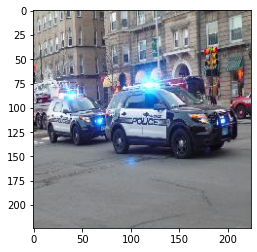

In [ ]:
img_name = rng.choice(images)
img = plt.imread(img_name)
plt.imshow(img)
print(img_name)

importing pandas library

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/Ineuron project/Emergency_vehicles/train.csv')

In [ ]:
df.tail()

,image_names,emergency_or_not
1641,1638.jpg,0
1642,1095.jpg,0
1643,1130.jpg,0
1644,1294.jpg,0
1645,860.jpg,1


need to check target column is balance or not
In DL we need to have balance data

In [ ]:
df.emergency_or_not.value_counts()

0    965
1    681
Name: emergency_or_not, dtype: int64

In [ ]:
y = df.emergency_or_not.values

our target column is not balance. but still we have to say it is balance.

Emergency


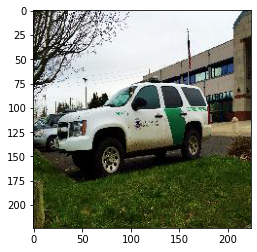

In [ ]:
row_index = rng.choice(df.index)
img_name = df.iloc[row_index]['image_names']
img = plt.imread(path+img_name)
plt.imshow(img)
target = df.iloc[row_index]['emergency_or_not']

if(target == 1):
  print('Emergency')
else:
  print('Non Emergency')




Most important things, we need to convert all images in an array

In [ ]:
 imageName = '1.jpg';

 x = []
 for img_name in df['image_names']:
   img = plt.imread(path + img_name)
   x.append(img)
x

[array([[[ 94,  96,  72],
         [ 98, 100,  79],
         [110, 111,  97],
         ...,
         [ 26,  57,  59],
         [ 23,  59,  59],
         [ 14,  53,  52]],
 
        [[114, 116,  92],
         [103, 105,  84],
         [ 95,  96,  82],
         ...,
         [ 22,  50,  53],
         [ 23,  54,  56],
         [ 19,  53,  52]],
 
        [[ 90,  92,  68],
         [103, 105,  84],
         [105, 106,  92],
         ...,
         [ 17,  36,  42],
         [ 21,  45,  47],
         [ 21,  49,  50]],
 
        ...,
 
        [[ 79,  78,  76],
         [ 81,  80,  78],
         [ 83,  82,  80],
         ...,
         [ 79,  78,  76],
         [ 77,  76,  74],
         [ 72,  71,  69]],
 
        [[ 76,  75,  73],
         [ 78,  77,  75],
         [ 81,  80,  78],
         ...,
         [ 73,  72,  70],
         [ 71,  70,  68],
         [ 67,  66,  64]],
 
        [[ 77,  76,  74],
         [ 80,  79,  77],
         [ 83,  82,  80],
         ...,
         [ 72,  71,  69],
  

In [ ]:
 x = np.array(x)
 x.shape

(1646, 224, 224, 3)

we converted images into array. so size become total records along with size

In [ ]:
from tensorflow.keras.layers import Dense

seed = 42
rng = np.random.RandomState(seed)
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.layers import MaxPooling2D

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=seed)

In [ ]:
x_train.shape

(1152, 224, 224, 3)

In [ ]:
x_test.shape

(494, 224, 224, 3)

In [ ]:
y_train.shape

(1152,)

Model total parameter will help us understanding the model depth

In [ ]:
from tensorflow.keras.layers import BatchNormalization
# this step is common when you build your model
model = Sequential()
# we give the length of input image
model.add(InputLayer(input_shape=(224, 224, 3)))
# for this we adding convolutional with filter of 125 and kernel size is  (5,5)
model.add(Conv2D(filters=125,kernel_size=(5,5),activation='relu',strides=(2,2),padding='same'))
model.add(Conv2D(filters=150,kernel_size=(5,5),activation='relu',strides=(2,2),padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(8,8), padding='valid'))

model.add(Conv2D(filters=200,kernel_size=(3,3),activation='relu',strides=(2,2),padding='same'))
model.add(Conv2D(filters=225,kernel_size=(3,3),activation='relu',strides=(2,2),padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=250,kernel_size=(3,3),activation='relu',strides=(2,2),padding='same'))
model.add(Conv2D(filters=275,kernel_size=(3,3),activation='relu',strides=(2,2),padding='same'))

model.add(GlobalMaxPooling2D())
#model3.add(Dense(units=100,activation='sigmoid'))
# final layer we can use classifier, in this case we have two class then we are using activation function is sigmoid
model.add(Dense(units=1,activation='sigmoid'))
# import thing is in neural building is compile. we are using image data so we have to specify loss function
# appropriate to problem
model.compile(loss='binary_crossentropy',optimizer='sgd', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 112, 112, 125)     9500      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 56, 56, 150)       468900    
_________________________________________________________________
batch_normalization (BatchNo (None, 56, 56, 150)       600       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 7, 7, 150)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 200)         270200    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 2, 2, 225)         405225    
_________________________________________________________________
batch_normalization_1 (Batch (None, 2, 2, 225)         9

In [ ]:
model.fit(x_train, y_train, epochs=3000, batch_size=128, validation_data=(x_test,y_test),verbose=2)

Epoch 1/3000
9/9 - 6s - loss: 0.6818 - accuracy: 0.5738 - val_loss: 0.6888 - val_accuracy: 0.5688
Epoch 2/3000
9/9 - 5s - loss: 0.6515 - accuracy: 0.6302 - val_loss: 0.6787 - val_accuracy: 0.5688
Epoch 3/3000
9/9 - 5s - loss: 0.6234 - accuracy: 0.6424 - val_loss: 0.6641 - val_accuracy: 0.5688
Epoch 4/3000
9/9 - 5s - loss: 0.5948 - accuracy: 0.7118 - val_loss: 0.6417 - val_accuracy: 0.5729
Epoch 5/3000
9/9 - 5s - loss: 0.5597 - accuracy: 0.7648 - val_loss: 0.6089 - val_accuracy: 0.6174
Epoch 6/3000
9/9 - 5s - loss: 0.5195 - accuracy: 0.7856 - val_loss: 0.5736 - val_accuracy: 0.7146
Epoch 7/3000
9/9 - 5s - loss: 0.4760 - accuracy: 0.8168 - val_loss: 0.5404 - val_accuracy: 0.7551
Epoch 8/3000
9/9 - 5s - loss: 0.4378 - accuracy: 0.8351 - val_loss: 0.5229 - val_accuracy: 0.7632
Epoch 9/3000
9/9 - 5s - loss: 0.4038 - accuracy: 0.8481 - val_loss: 0.4955 - val_accuracy: 0.7854
Epoch 10/3000
9/9 - 5s - loss: 0.3681 - accuracy: 0.8576 - val_loss: 0.4930 - val_accuracy: 0.7854
Epoch 11/3000
9/9 -

In [ ]:
test = pd.read_csv('/content/drive/My Drive/Ineuron project/Emergency_vehicles/test_vc2kHdQ.csv')

In [ ]:
test.head()

,image_names
0,1960.jpg
1,668.jpg
2,2082.jpg
3,808.jpg
4,1907.jpg


In [ ]:
 imageName = '1.jpg';

test_image = []
 for img_name in test['image_names']:
   img = plt.imread(path + img_name)
   test_image.append(img)
test_image
tests = np.array(test_image)

In [ ]:
# making predictions
predictions = model.predict_classes(tests)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [ ]:
download = drive.CreateFile({'id': '1ncXVYCLMHORPQuGdOs6AVy4bIj_HZmM4'})
download.GetContentFile('/content/drive/My Drive/Ineuron project/Emergency_vehicles/sample_submission_yxjOnvz.csv')

In [ ]:
sample = pd.read_csv('/content/drive/My Drive/Ineuron project/Emergency_vehicles/sample_submission_yxjOnvz.csv')
print(sample.head())
sample['image_names'] = test['image_names']
sample['emergency_or_not'] = predictions
sample.to_csv('sample_cnn.csv', header=True, index=False)

  image_names
0    1960.jpg
1     668.jpg
2    2082.jpg
3     808.jpg
4    1907.jpg
